## Submission Record
1. LB result of v1 - Your submission scored 0.41897

## Kaggle Quora- Identifying Duplicate Questions
Data Introduction
The goal of this competition is to predict which of the provided pairs of questions contain two questions with the same meaning. 

The ground truth is the set of labels that have been supplied by human experts. The ground truth labels are inherently subjective, as the true meaning of sentences can never be known with certainty. Human labeling is also a 'noisy' process, and reasonable people will disagree. 

As a result, the ground truth labels on this dataset should be taken to be 'informed' but not 100% accurate, and may include incorrect labeling. We believe the labels, on the whole, to represent a reasonable consensus, but this may often not be true on a case by case basis for individual items in the dataset.

Please note: as an anti-cheating measure, Kaggle has supplemented the test set with computer-generated question pairs. Those rows do not come from Quora, and are not counted in the scoring. All of the questions in the training set are genuine examples from Quora.

Data fields
id - the id of a training set question pair
qid1, qid2 - unique ids of each question (only available in train.csv)
question1, question2 - the full text of each question
is_duplicate - the target variable, set to 1 if question1 and question2 have essentially the same meaning, and 0 otherwise.

1. Data Import
2. EDA

### 1. Data Import 

In [1]:
#Importing libraries
import pandas as pd
import numpy as np
import datetime
import re
import nltk
pd.set_option('display.max_columns', None)

In [2]:
#Import Training Data
train = pd.read_csv(r"D:\DS Tools\notebooks\KaggleQuora\train.csv")

In [3]:
#Import Test Data
test = pd.read_csv(r"D:\DS Tools\notebooks\KaggleQuora\test.csv")

## 2. EDA

In [4]:
#Shape
train.shape, test.shape

((404290, 6), (2345796, 3))

In [5]:
train.describe()

,id,qid1,qid2,is_duplicate
count,404290.000000,404290.000000,404290.000000,404290.000000
mean,202144.500000,217243.942418,220955.655337,0.369198
std,116708.614502,157751.700002,159903.182629,0.482588
min,0.000000,1.000000,2.000000,0.000000
25%,101072.250000,74437.500000,74727.000000,0.000000
50%,202144.500000,192182.000000,197052.000000,0.000000
75%,303216.750000,346573.500000,354692.500000,1.000000
max,404289.000000,537932.000000,537933.000000,1.000000


In [6]:
train.head()

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0


In [7]:
#What is the most popular question?
qid1_pivot = pd.pivot_table(data=train, columns= ['qid1'], values='id', aggfunc=np.count_nonzero)
qid2_pivot = pd.pivot_table(data=train, columns= ['qid2'], values='id', aggfunc=np.count_nonzero)

In [8]:
qid1_pivot.sort_values(ascending=False)

qid1
8461      50
14110     48
25984     47
1749      47
20628     47
4951      46
14772     45
27618     45
58173     44
19200     42
3595      42
9006      42
2559      42
1885      41
14111     41
71948     41
6551      40
24296     40
31868     39
21712     39
51617     39
6099      38
7529      38
19199     37
17761     36
47485     36
6799      36
10433     36
10859     36
4264      35
          ..
341402     1
341400     1
341398     1
341397     1
341396     1
341392     1
341390     1
341387     1
341386     1
341382     1
341380     1
341378     1
341376     1
341374     1
341368     1
341366     1
341363     1
341361     1
341359     1
341357     1
341356     1
341354     1
341350     1
341347     1
341345     1
341340     1
341338     1
341335     1
341332     1
1          0
Name: id, dtype: int64

In [9]:
qid2_pivot.sort_values(ascending=False)

qid2
30782     120
2559      115
4044      100
2561       71
17978      66
28764      59
14376      59
28133      52
38         52
18531      51
20190      49
1772       46
6275       46
24555      45
60274      44
4367       44
22064      43
30647      43
6749       42
11264      42
6100       42
4507       41
2921       41
7801       41
18355      40
4416       40
9262       40
41885      40
12639      40
691        40
         ... 
347653      1
347657      1
347659      1
347661      1
347666      1
347603      1
347668      1
347669      1
347670      1
347671      1
347673      1
347676      1
347645      1
347642      1
347640      1
347637      1
347634      1
347633      1
347627      1
347625      1
347623      1
347621      1
347619      1
347615      1
347613      1
347610      1
347609      1
347607      1
347604      1
2           0
Name: id, dtype: int64

In [10]:
#Taking a look at the most popular question for qid1 - How do I improve my English?
train[train['qid1']==8461] #This appears 50 times

,id,qid1,qid2,question1,question2,is_duplicate
4279,4279,8461,8462,How do I improve my English speaking?,How do I improve my pronunciation in English?,1
11300,11300,8461,10859,How do I improve my English speaking?,How can I specifically improve my English?,1
14828,14828,8461,11396,How do I improve my English speaking?,How can I improve my English speaking ability?,1
23369,23369,8461,2438,How do I improve my English speaking?,How can I improve my pronunciation in English?,1
27111,27111,8461,12214,How do I improve my English speaking?,How can I improve my pronunciation of English ...,1
31918,31918,8461,21693,How do I improve my English speaking?,How could I improve my English?,1
32544,32544,8461,55435,How do I improve my English speaking?,How can I improve my English in a very short t...,1
60570,60570,8461,3939,How do I improve my English speaking?,What is the best way to improve my spoken Engl...,1
90399,90399,8461,13756,How do I improve my English speaking?,How can I improve English speaking skill?,1
96548,96548,8461,11477,How do I improve my English speaking?,I want to improve my English?,1


In [11]:
#Taking a look at the most popular question.
train[train['qid2']==30782]# This appears 120 times

,id,qid1,qid2,question1,question2,is_duplicate
16138,16138,30781,30782,If I link my Instagram account to my Facebook ...,How can you look at someone's private Instagra...,0
16183,16183,30866,30782,Can you view pictures on Instagram without an ...,How can you look at someone's private Instagra...,0
17232,17232,32775,30782,How many Oriya girls wear mini skirts?,How can you look at someone's private Instagra...,0
20239,20239,38203,30782,Why did Symbian fail?,How can you look at someone's private Instagra...,0
22376,22376,41999,30782,How do I see followers on someone's private In...,How can you look at someone's private Instagra...,0
29583,29583,54720,30782,Why did my crush followed my cousin's private ...,How can you look at someone's private Instagra...,0
39470,39470,71541,30782,Is there a way to view a private Instagram?,How can you look at someone's private Instagra...,0
43079,43079,77543,30782,How do I recover a deleted Instagram name?,How can you look at someone's private Instagra...,0
47124,47124,58696,30782,Is it possible to view someone's private Insta...,How can you look at someone's private Instagra...,0
47824,47824,48228,30782,How do I open a private Instagram account?,How can you look at someone's private Instagra...,0


In [12]:
#"How can you look at someone's private Instagram account without following them?"
train[train['qid2']==30782]['question2'][16138]

"How can you look at someone's private Instagram account without following them?"

In [13]:
# What is the best way to lose weight?
train[train['qid2']==2559] 

,id,qid1,qid2,question1,question2,is_duplicate
1283,1283,2558,2559,Why do I not lose weight when I throw up?,What are the best ways to lose weight?,0
2290,2290,4554,2559,Is it possible to reduce 17 lbs in one month?,What are the best ways to lose weight?,0
8765,8765,9036,2559,What is the quickest possible way to lose weight?,What are the best ways to lose weight?,0
9001,9001,17518,2559,How can I gain weight within 2 month?,What are the best ways to lose weight?,0
12247,12247,23609,2559,Can I loose my weight around 10kg in 25 days?,What are the best ways to lose weight?,0
18884,18884,35736,2559,What are the good diets for weight loss?,What are the best ways to lose weight?,0
20311,20311,38327,2559,Is it possible to lose 15 pounds in 4 months?,What are the best ways to lose weight?,0
26121,26121,48654,2559,What is the best way to lose weight and not to...,What are the best ways to lose weight?,0
33228,33228,61079,2559,What is the best probiotic for weight loss?,What are the best ways to lose weight?,0
36789,36789,67044,2559,How can I lose 35 pounds in 6-12 months?,What are the best ways to lose weight?,0


In [14]:
import seaborn as sns
%matplotlib inline

D:\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


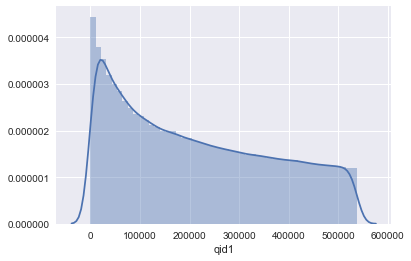

In [15]:
sns.distplot(train.qid1)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001D38D68F9E8>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000001D39166CC88>]], dtype=object)

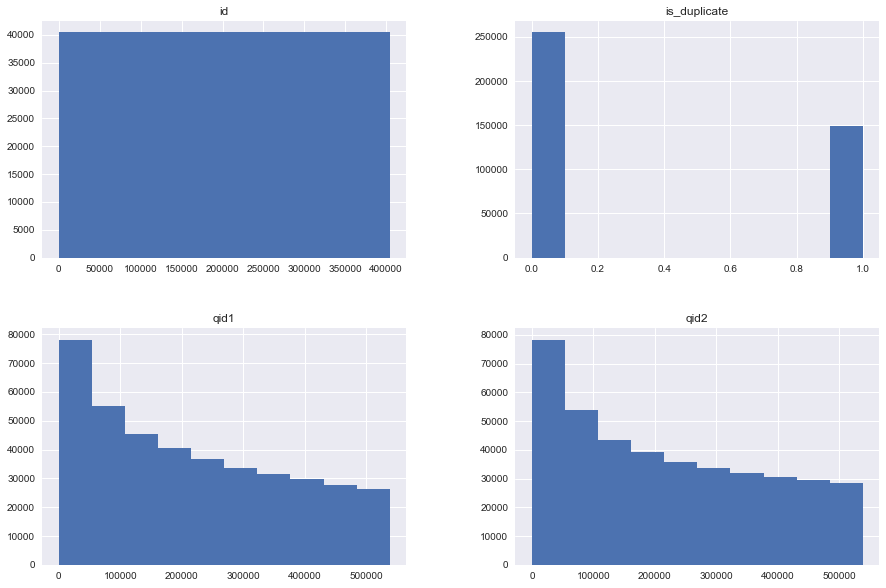

In [16]:
train.hist(figsize=(15,10))

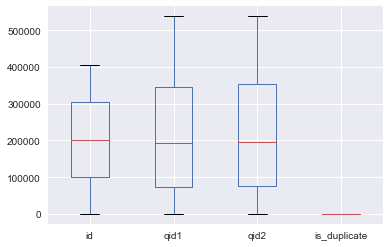

In [17]:
train.boxplot(figsize=(20,20))

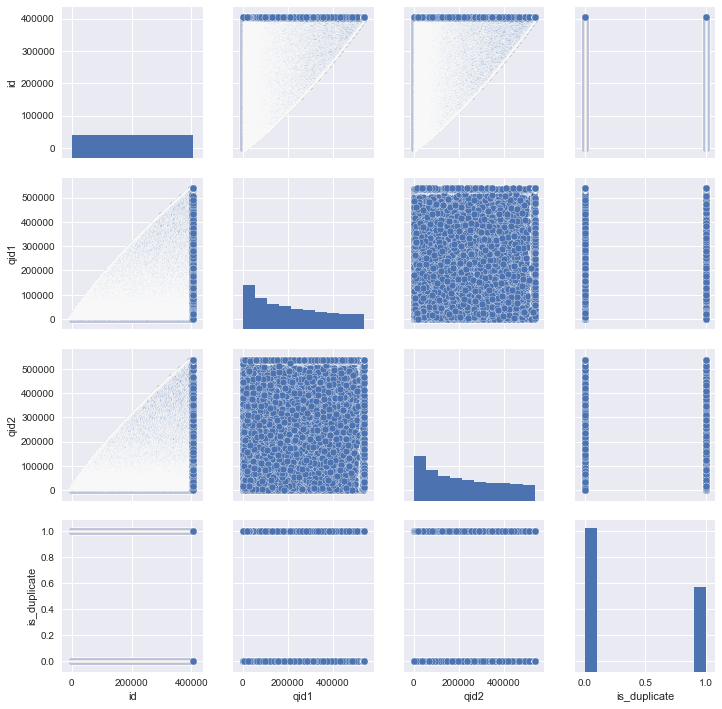

In [18]:
# Really cant say much with this pair plot
sns.pairplot(train)

## 3. Creating some features

In [19]:
#Getting the count of words in qid1
train['qid1_count'] = train["question1"].apply(lambda x : len(str(x).split()))
train['qid2_count'] = train["question2"].apply(lambda x : len(str(x).split()))
#What is the maximum difference between the length of two 'marked' duplicate questions?
train['count12_diff']= train['qid1_count']-train['qid2_count']  
train['count12_diff'] = train['count12_diff'].abs()

In [20]:
#From Anokas
train_qs = pd.Series(train['question1'].tolist() + train['question2'].tolist()).astype(str)
test_qs = pd.Series(test['question1'].tolist() + test['question2'].tolist()).astype(str)

In [21]:
qmarks = np.mean(train_qs.apply(lambda x: '?' in x))
math = np.mean(train_qs.apply(lambda x: '[math]' in x))
fullstop = np.mean(train_qs.apply(lambda x: '.' in x))
capital_first = np.mean(train_qs.apply(lambda x: x[0].isupper()))
capitals = np.mean(train_qs.apply(lambda x: max([y.isupper() for y in x])))
numbers = np.mean(train_qs.apply(lambda x: max([y.isdigit() for y in x])))

print('Questions with question marks: {:.2f}%'.format(qmarks * 100))
print('Questions with [math] tags: {:.2f}%'.format(math * 100))
print('Questions with full stops: {:.2f}%'.format(fullstop * 100))
print('Questions with capitalised first letters: {:.2f}%'.format(capital_first * 100))
print('Questions with capital letters: {:.2f}%'.format(capitals * 100))
print('Questions with numbers: {:.2f}%'.format(numbers * 100))

Questions with question marks: 99.87%
Questions with [math] tags: 0.12%
Questions with full stops: 6.31%
Questions with capitalised first letters: 99.81%
Questions with capital letters: 99.95%
Questions with numbers: 11.83%


In [22]:
from nltk.corpus import stopwords

stops = set(stopwords.words("english"))

def word_match_share(row):
    # Creating dictionaries of each word
    q1words = {}
    q2words = {}
    for word in str(row['question1']).lower().split():
        if word not in stops:
            q1words[word] = 1
    for word in str(row['question2']).lower().split():
        if word not in stops:
            q2words[word] = 1
    if len(q1words) == 0 or len(q2words) == 0:
        # The computer-generated chaff includes a few questions that are nothing but stopwords
        return 0
    shared_words_in_q1 = [w for w in q1words.keys() if w in q2words]
    shared_words_in_q2 = [w for w in q2words.keys() if w in q1words]
    R = (len(shared_words_in_q1) + len(shared_words_in_q2))/(len(q1words) + len(q2words))
    return R

# plt.figure(figsize=(15, 5))
# train_word_match = df_train.apply(word_match_share, axis=1, raw=True)
# plt.hist(train_word_match[df_train['is_duplicate'] == 0], bins=20, normed=True, label='Not Duplicate')
# plt.hist(train_word_match[df_train['is_duplicate'] == 1], bins=20, normed=True, alpha=0.7, label='Duplicate')
# plt.legend()
# plt.title('Label distribution over word_match_share', fontsize=15)
# plt.xlabel('word_match_share', fontsize=15)


In [23]:
# Applying the function to the train dataset
train['match_share'] = train.apply(word_match_share, axis=1, raw=True)

## Generating N-grams features

In [24]:
from nltk import word_tokenize, ngrams

# Functions to create n-grams
def one_gram(row):
    #Storing the data
    que1 = str(row['question1'])
    que2 = str(row['question2'])
    
    #Unigrams
    one_que1 = [word for word in que1.lower().split() if word not in stops]
    one_que2 = [word for word in que2.lower().split() if word not in stops]
    #common elements
    common_onegram = len(set(one_que1).intersection(set(one_que2)))
    #% of common stuff
    onegram_pct = float(common_onegram) / max(len(set(one_que1).union(set(one_que2))),1)
    return onegram_pct

def two_gram(row):
    
    #Storing the data
    que1 = str(row['question1'])
    que2 = str(row['question2'])
    
    #Unigrams
    one_que1 = [word for word in que1.lower().split() if word not in stops]
    one_que2 = [word for word in que2.lower().split() if word not in stops]
    #2 grams
    two_que1 = [word for word in ngrams(one_que1, 2)]
    two_que2 = [word for word in ngrams(one_que2, 2)]
    #common elements
    common_twogram = len(set(two_que1).intersection(set(two_que2)))
    #% of common stuff
    twogram_pct = float(common_twogram)/max(len(set(two_que1).union(set(two_que2))),1)
    return twogram_pct

def three_gram(row):
    #Storing the data
    que1 = str(row['question1'])
    que2 = str(row['question2'])
    
    #Unigrams
    one_que1 = [word for word in que1.lower().split() if word not in stops]
    one_que2 = [word for word in que2.lower().split() if word not in stops]
    # 3 grams
    three_que1 = [word for word in ngrams(one_que1, 3)]
    three_que2 = [word for word in ngrams(one_que2, 3)]
    #common elements
    common_threegram = len(set(three_que1).intersection(set(three_que2)))
    #% of common stuff
    threegram_pct = float(common_threegram)/max(len(set(three_que1).union(set(three_que2))),1)
    
    return threegram_pct

In [25]:
from collections import Counter
import re, math

# Function to get cosine similarity
def get_cosine(row):
    # Creating dictionaries of each word
    q1words = {}
    q2words = {}
    for word in str(row['question1']).lower().split():
        if word not in stops:
            q1words[word] = 1
    for word in str(row['question2']).lower().split():
        if word not in stops:
            q2words[word] = 1
    if len(q1words) == 0 or len(q2words) == 0:
        # The computer-generated chaff includes a few questions that are nothing but stopwords
        return 0
    vec1 = Counter(q1words)
    vec2 = Counter(q2words)
    intersection = set(vec1.keys()) & set(vec2.keys())
    numerator = sum([vec1[x] * vec2[x] for x in intersection])
    sum1 = sum([vec1[x]**2 for x in vec1.keys()])
    sum2 = sum([vec2[x]**2 for x in vec2.keys()])
    denominator = math.sqrt(sum1) * math.sqrt(sum2)
    if not denominator:
        return 0.0
    else:
        return float(numerator) / denominator

In [26]:
train['onegram_pct'] = train.apply(one_gram, axis=1, raw=True)
train['twogram_pct'] = train.apply(two_gram, axis=1, raw=True)
train['threegram_pct'] = train.apply(three_gram, axis=1, raw=True)

D:\Anaconda3\lib\site-packages\ipykernel\__main__.py:28: DeprecationWarning: generator 'ngrams' raised StopIteration
D:\Anaconda3\lib\site-packages\ipykernel\__main__.py:29: DeprecationWarning: generator 'ngrams' raised StopIteration
D:\Anaconda3\lib\site-packages\ipykernel\__main__.py:46: DeprecationWarning: generator 'ngrams' raised StopIteration
D:\Anaconda3\lib\site-packages\ipykernel\__main__.py:45: DeprecationWarning: generator 'ngrams' raised StopIteration


In [27]:
train['Cosine'] = train.apply(get_cosine, axis=1)

## Working on the test data

In [28]:
#Applying all the functions to the test data.
test['qid1_count'] = test["question1"].apply(lambda x : len(str(x).split()))
test['qid2_count'] = test["question2"].apply(lambda x : len(str(x).split()))
#What is the maximum difference between the length of two 'marked' duplicate questions?
test['count12_diff']= test['qid1_count']-test['qid2_count']  
test['count12_diff'] = test['count12_diff'].abs()
test['match_share'] = test.apply(word_match_share, axis=1, raw=True)
test['onegram_pct'] = test.apply(one_gram, axis=1, raw=True)
test['twogram_pct'] = test.apply(two_gram, axis=1, raw=True)
test['threegram_pct'] = test.apply(three_gram, axis=1, raw=True)
test['Cosine'] = test.apply(get_cosine, axis=1)

D:\Anaconda3\lib\site-packages\ipykernel\__main__.py:29: DeprecationWarning: generator 'ngrams' raised StopIteration
D:\Anaconda3\lib\site-packages\ipykernel\__main__.py:28: DeprecationWarning: generator 'ngrams' raised StopIteration
D:\Anaconda3\lib\site-packages\ipykernel\__main__.py:46: DeprecationWarning: generator 'ngrams' raised StopIteration
D:\Anaconda3\lib\site-packages\ipykernel\__main__.py:45: DeprecationWarning: generator 'ngrams' raised StopIteration


In [29]:
#Getting a unique list of QID
qid1_list = train['qid1'].unique()
qid2_list = train['qid2'].unique()

In [30]:
#Stemming

In [31]:
#length of unique elements
len(qid1_list), len(qid2_list)

(290654, 299364)

In [32]:
#Unique elements in both the lists
len(set(qid1_list).symmetric_difference(set(qid2_list)))

485848

In [33]:
#common items in qid1 and qid2
len(set(qid1_list).intersection(set(qid2_list)))

52085

#1) If they have the same meaninig. How do we ascertian the meaning of the questions

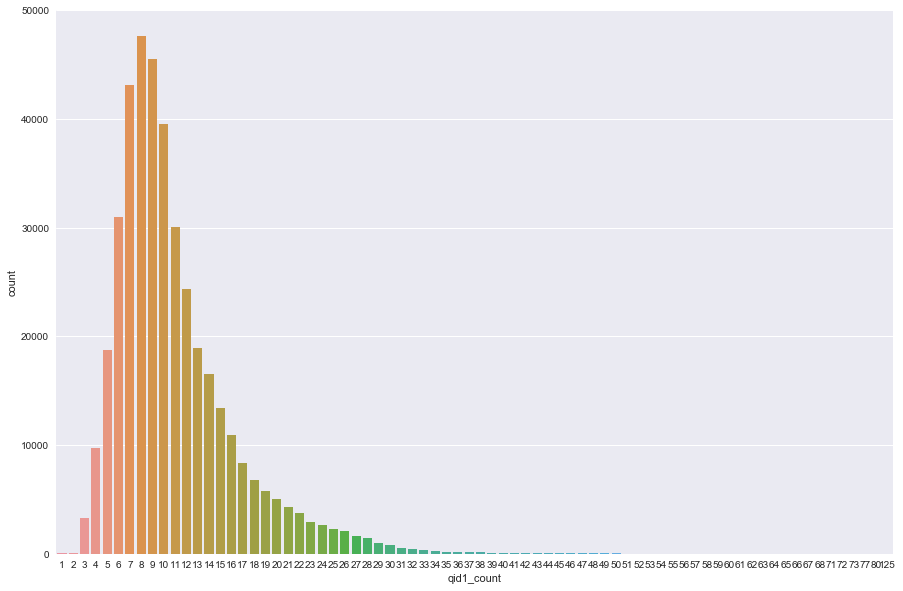

In [34]:
from matplotlib import pyplot
fig, ax = pyplot.subplots(figsize=(15,10))
sns.countplot(x="qid1_count", data=train, ax=ax)

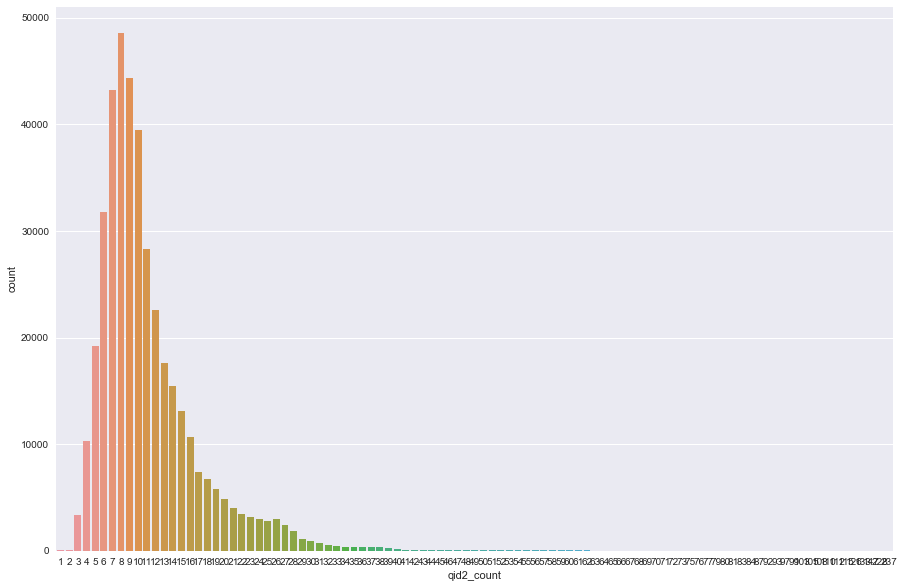

In [35]:
from matplotlib import pyplot
fig, ax = pyplot.subplots(figsize=(15,10))
sns.countplot(x="qid2_count", data=train, ax=ax )

In [36]:
#Length of questions 
train.groupby(['qid1_count'])['id'].count()

qid1_count
1         70
2         70
3       3331
4       9751
5      18748
6      30951
7      43079
8      47608
9      45475
10     39485
11     30038
12     24356
13     18880
14     16485
15     13394
16     10903
17      8365
18      6793
19      5773
20      5028
21      4269
22      3736
23      2906
24      2605
25      2250
26      2070
27      1643
28      1437
29      1015
30       807
       ...  
45        48
46        42
47        30
48        28
49        43
50        29
51        22
52        18
53        17
54        22
55        13
56         6
57        15
58        11
59         8
60         9
61        12
62         7
63         5
64         5
65         3
66         2
67         1
68         3
71         1
72         1
73         2
77         1
80         1
125        1
Name: id, dtype: int64

In [37]:
#Length of questions 
train.groupby(['qid2_count'])['id'].count()

qid2_count
1         27
2         45
3       3400
4      10306
5      19237
6      31808
7      43243
8      48569
9      44326
10     39491
11     28332
12     22623
13     17627
14     15484
15     13117
16     10718
17      7362
18      6714
19      5761
20      4901
21      4020
22      3494
23      3180
24      3003
25      2807
26      2950
27      2408
28      1893
29      1145
30       953
       ...  
68         3
69         5
70         2
71         4
72         1
73         4
75         4
76         3
77         3
79         1
80         1
81         1
83         1
84         1
87         1
92         3
93         1
97         1
99         1
103        1
105        1
108        2
110        1
112        2
115        1
126        3
133        1
147        1
228        3
237       13
Name: id, dtype: int64

In [38]:
#Length of questions 
train.groupby(['is_duplicate'])['id'].count()/len(train)

is_duplicate
0    0.630802
1    0.369198
Name: id, dtype: float64

In [39]:
train.loc[14]['question2']

'What are the laws to change your status from a student visa to a green card in the US? How do they compare to the immigration laws in Japan?'

In [40]:
# the longest question in qid2
train[train['qid2_count']==237]['question2'][18055]

"Heartbreak? Heartbreak? She's my girlfriend for two months, I chose her over my girlfriend for 2 years. I like her so much to the point that I can't let her go even if she wants to end our relationship because of the other people around us most especially her family. I do the things for her that I'm not used to for a girl and I am willing to sacrifice everything just to have a little time with her. A little and limited time that I'm asking from her but she don't wanna give it to me. She's scared that someone might see us, that she's still having an affair with me. I love her and I want to be with her at least once a week even if just for a limited time. I'm not sure if I'm doing the right thing, all of my friends told me to stop it and just let it go 2 months is just 2 months not a deep relationship. But they don't feel what I feel, in this span of time I learned a lot, I learned how to love, to be loved, to sacrifice a good life, and to sacrifice a better clear future. My mind tells 

In [41]:
# the longest question in qid1
train.ix[train['qid1_count'].idxmax()]

id                                                           35101
qid1                                                         64190
qid2                                                         64191
question1        Like everyone else (here in U.S), I work with ...
question2        When is it ok to force people to do things aga...
is_duplicate                                                     0
qid1_count                                                     125
qid2_count                                                      27
count12_diff                                                    98
match_share                                               0.123077
onegram_pct                                              0.0655738
twogram_pct                                                      0
threegram_pct                                                    0
Cosine                                                    0.178174
Name: 35101, dtype: object

In [42]:
train

,id,qid1,qid2,question1,question2,is_duplicate,qid1_count,qid2_count,count12_diff,match_share,onegram_pct,twogram_pct,threegram_pct,Cosine
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0,14,12,2,0.727273,0.571429,0.571429,0.500000,0.730297
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0,8,13,5,0.307692,0.181818,0.100000,0.000000,0.333333
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0,14,10,4,0.363636,0.222222,0.000000,0.000000,0.365148
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0,11,9,2,0.000000,0.000000,0.000000,0.000000,0.000000
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0,13,7,6,0.000000,0.000000,0.000000,0.000000,0.000000
5,5,11,12,Astrology: I am a Capricorn Sun Cap moon and c...,"I'm a triple Capricorn (Sun, Moon and ascendan...",1,16,16,0,0.470588,0.307692,0.066667,0.000000,0.471405
6,6,13,14,Should I buy tiago?,What keeps childern active and far from phone ...,0,4,11,7,0.000000,0.000000,0.000000,0.000000,0.000000
7,7,15,16,How can I be a good geologist?,What should I do to be a great geologist?,1,7,9,2,0.500000,0.333333,0.000000,0.000000,0.500000
8,8,17,18,When do you use シ instead of し?,"When do you use ""&"" instead of ""and""?",0,8,8,0,0.500000,0.333333,0.000000,0.000000,0.500000
9,9,19,20,Motorola (company): Can I hack my Charter Moto...,How do I hack Motorola DCX3400 for free internet?,0,9,9,0,0.363636,0.222222,0.000000,0.000000,0.365148


## Xgboost

In [43]:
#Importing the library
import xgboost as xgb

D:\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [44]:
#Creating the predictors (X) and the Target Variables(Y) for the test and train data.
train_X = train[['qid1_count', 'qid2_count', 'count12_diff', 'match_share',
       'onegram_pct', 'twogram_pct', 'threegram_pct', 'Cosine']]
train_Y = train [['is_duplicate']]

#train_y = xgb.DMatrix(train_Y). Special D Matrix
train_x = xgb.DMatrix(train_X , label=train_Y)


In [45]:
#Prepping the test data.
test_X = test[['qid1_count', 'qid2_count', 'count12_diff', 'match_share',
       'onegram_pct', 'twogram_pct', 'threegram_pct', 'Cosine']]
test_x = xgb.DMatrix(test_X)

In [46]:
#Parameters of the model
param = {'max_depth':8, 'eta':0.02, 'silent':1, 'objective':'binary:logistic', 'eval_metric':'logloss' }
watchlist = [(train_x, 'train'), (test_x, 'test')]

In [47]:
#Training the model
model =  xgb.train(params= param , dtrain = train_x ,num_boost_round=300,  verbose_eval=10   )

In [48]:
#Model Prediction output
preds = model.predict(test_x)

In [49]:
test['is_duplicate'] = preds

In [50]:
#Creating the is_duplicate flag
#test['is_duplicate'] = 0
#test['is_duplicate'][(test['Preds']> 0.70)] = 1

In [51]:
#Exporting the submission data
test[['test_id', 'is_duplicate']].to_csv('sub3.csv' , index = False)